In [13]:
import glob
import os
import PIL
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
seed = 999
random.seed(seed)
torch.manual_seed(seed)

In [10]:
big_images = glob.glob("../../data/raw_images/*")

In [15]:
print(big_images[0])

../../data/raw_images/2017.jpg


In [98]:
batch_size = 32
image_size = 256
nc = 1
nz = image_size
ngf = image_size//8
ndf = 64
num_epochs = 5
lr = 0.0002
beta1 = 0.5
ngpu = 0

In [99]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [102]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d( nz, ngf * 8, 1, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )
    def forward(self, input):
        return self.main(input)

In [105]:
x = Generator()
print(x(torch.Tensor(np.random.rand(image_size, image_size, 1, 1))).shape)

torch.Size([256, 1, 16, 16])


In [87]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [88]:
x = Generator()
print(x(torch.Tensor(np.random.rand(image_size,image_size, 1))))

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [256, 512, 4, 4], but got 3-dimensional input of size [256, 256, 1] instead

In [74]:
criterion = nn.BCELoss()

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

NameError: name 'netD' is not defined

In [71]:
x = Generator()
print(x)
print(x(torch.tensor(np.random.rand(image_size, image_size, 1))))

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): ConvTranspose2d(256, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): ConvTranspose2d(64, 1, ker

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [256, 256, 1, 1], but got 3-dimensional input of size [256, 256, 1] instead

(2927, 4800)


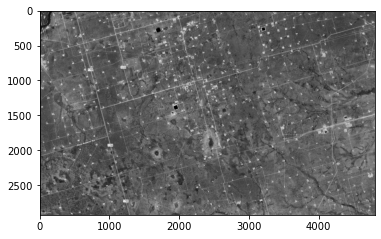

../../data/raw_images/2017.jpg
(2927, 4800)


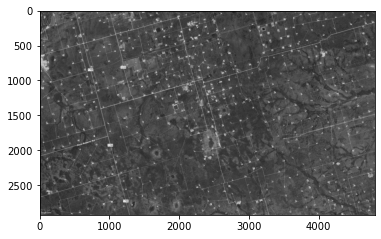

../../data/raw_images/2016.jpg
(2927, 4800)


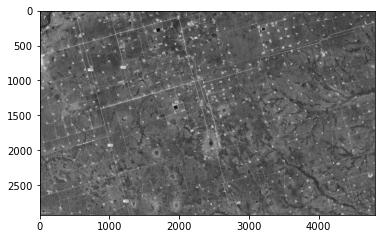

../../data/raw_images/2014.jpg
(2927, 4800)


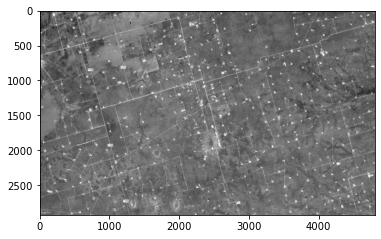

../../data/raw_images/2011.jpg
(2927, 4800)


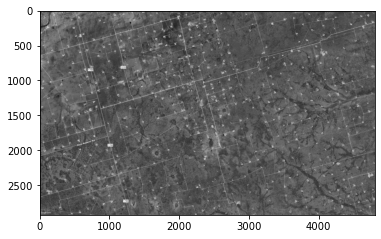

../../data/raw_images/2013.jpg
(2927, 4800)


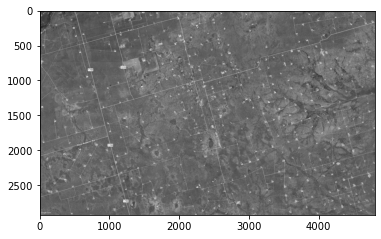

../../data/raw_images/2009.jpg
(2927, 4800)


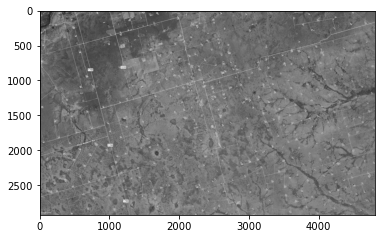

../../data/raw_images/2008.jpg
(2927, 4800)


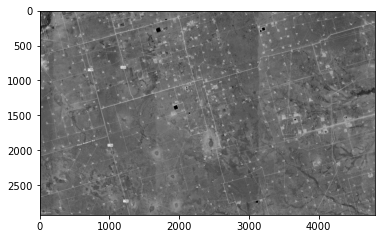

../../data/raw_images/2018.jpg


In [44]:
"""for image in big_images:
    with PIL.Image.open(Image)).mean(axis=2) as img:
        plt.imshow(np.asarray(img), cmap='gray')
        print(np.asarray(img).shape)
        plt.show()
        print(image)"""

In [45]:
def get_random_crop(first, second):
    width, height = first.shape
    max_start_x = width-image_size
    max_start_y = height-image_size
    start_x = random.randrange(0, max_start_x)
    start_y = random.randrange(0, max_start_y)
    return (first[start_x:start_x+image_size, start_y:start_y+image_size], 
        second[start_x:start_x+image_size, start_y:start_y+image_size])